In [37]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [38]:
cars = pd.read_csv("final_cars.csv")

In [39]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [40]:
X = pd.get_dummies(X)

In [41]:
X.shape

(201, 37)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [44]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10,20,30, 50] , 'max_depth' :[2,3,4, 8, 10]}]

In [45]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 3, 4, 8, 10],
                          'n_estimators': [10, 20, 30, 50]}])

In [46]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8441044288804693 {'max_depth': 2, 'n_estimators': 10}
0.8280378340245997 {'max_depth': 2, 'n_estimators': 20}
0.8193936130483068 {'max_depth': 2, 'n_estimators': 30}
0.8220127611799285 {'max_depth': 2, 'n_estimators': 50}
0.8485670017274958 {'max_depth': 3, 'n_estimators': 10}
0.8548613833222806 {'max_depth': 3, 'n_estimators': 20}
0.8487902241026047 {'max_depth': 3, 'n_estimators': 30}
0.8500156412988058 {'max_depth': 3, 'n_estimators': 50}
0.8564352686614856 {'max_depth': 4, 'n_estimators': 10}
0.8608561508198547 {'max_depth': 4, 'n_estimators': 20}
0.847935651830851 {'max_depth': 4, 'n_estimators': 30}
0.8527497619365404 {'max_depth': 4, 'n_estimators': 50}
0.8608522952440388 {'max_depth': 8, 'n_estimators': 10}
0.8554731946777945 {'max_depth': 8, 'n_estimators': 20}
0.8695524853969078 {'max_depth': 8, 'n_estimators': 30}
0.8573516564866119 {'max_depth': 8, 'n_estimators': 50}
0.8590889476734593 {'max_depth': 10, 'n_estimators': 10}
0.8567805389095862 {'max_depth': 10, 'n_estimato

In [47]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 30}

In [48]:
grid_search.best_score_

0.8695524853969078

In [49]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=30)

### Build model with best estimator

In [50]:
model = grid_search.best_estimator_

In [51]:
y_pred = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [53]:
r2_score(y_test,y_pred)

0.9285461767442909

In [54]:
np.sqrt(mse)

2510.0518377453045

<Axes: ylabel='price'>

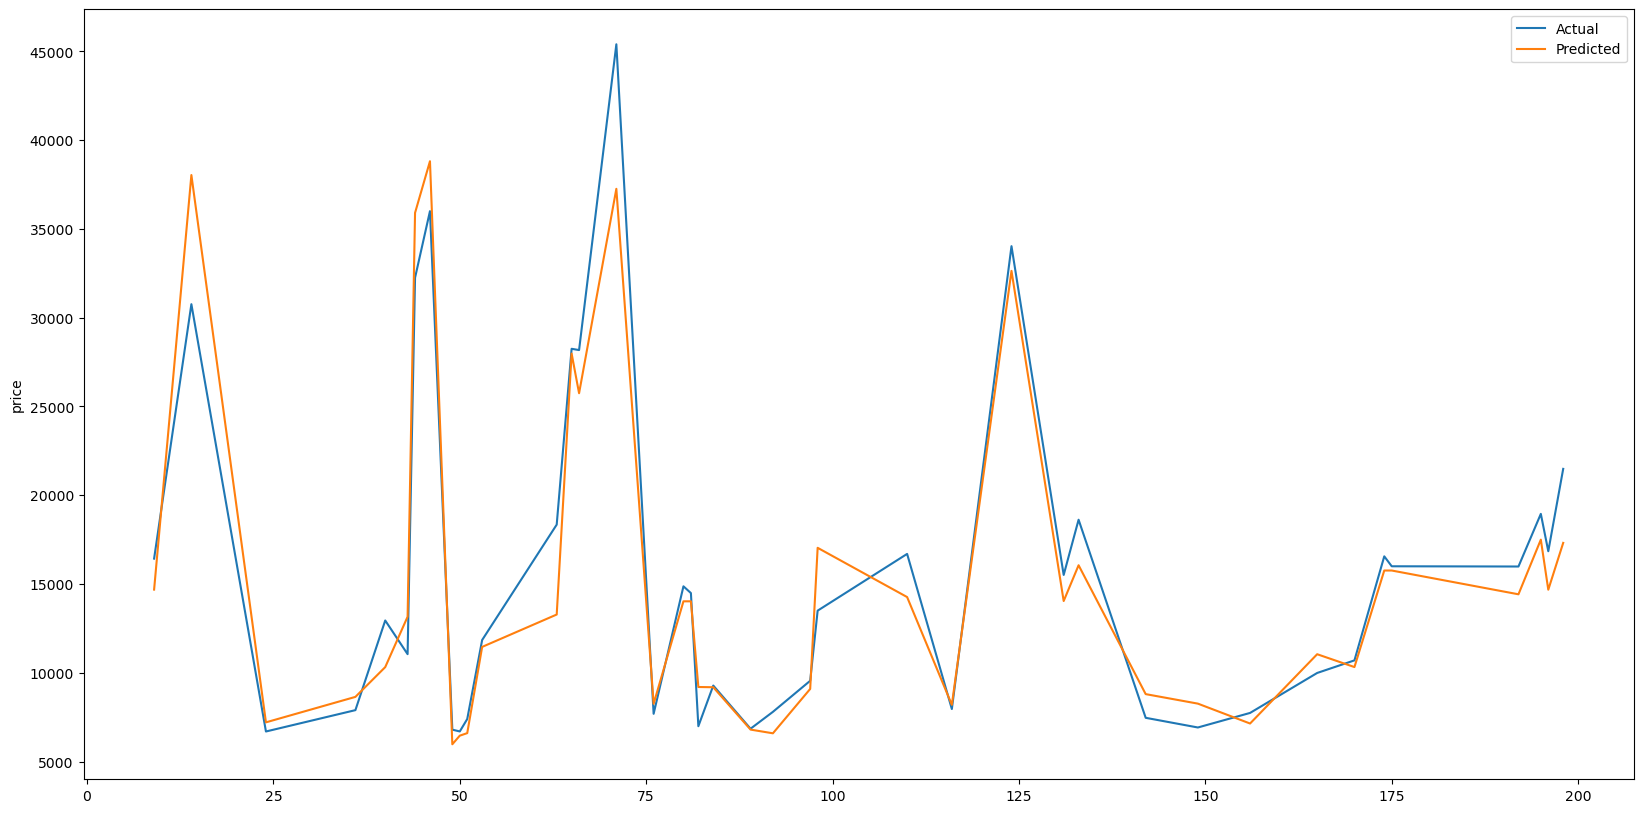

In [55]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")